1. Escriba dos conjuntos de ecuaciones de Lotka-Volterra con coeficientes diferentes que
representen un sistema en equilibrio, tal que el número de Presas es siempre 3000 y el
número de Depredadores es siempre 500.

$u=3000$, $v=500$

$v=\frac{\alpha}{\beta}$, $500=\frac{\alpha}{\beta}$

$u=\frac{\gamma}{\delta}$, $3000=\frac{\gamma}{\delta}$

$$\alpha=5/10$$
$$\beta=\alpha/500$$
$$\gamma=1/10$$
$$\delta=\gamma/3000$$

$$\frac{\Delta u}{\Delta t}=0.5 u - 0.5/500 uv$$
$$\frac{\Delta v}{\Delta t}=0.1/3000 uv-0.1 v$$



2. Escriba las ecuaciones diferenciales y las ecuaciones en diferencias finitas (en términos
de $\Delta$'s) de un modelo Depredador presa donde hay un número máximo M de
depredadores.

$$\frac{dv}{dt}=\delta uv(1-\frac{v}{M})-\gamma v$$
$$\frac{\Delta v}{\Delta t}=\delta uv(1-\frac{v}{M})-\gamma v$$
$$\Delta v=[\delta uv(1-\frac{v}{M})-\gamma v]*\Delta t$$

$$v_{t+1}=v_t + [\delta u_t v_t(1-\frac{v_t}{M})-\gamma v_t]*\Delta t$$

3. La ballena azul, que puede crecer hasta 30m de longitud, es una ballena 'baleen' cuya
comida favorita es el krill antártico, un camarón pequeño de cerca de 5cm de longitud. La
ecuación de diferencias para el cambio en la población de krills es similar al estudiado en
clase, excepto que el término de nacimientos debe ser logístico (recuerde el taller de
crecimiento limitado). La ecuación de diferencias para el cambio en la población del a
ballenas azules es también logístico salvo que la población máxima de ballenas no es
constante sino que es proporcional a la población de camarones. Escriba la ecuación de
diferencias que modelen este sistema (pueden buscar Greenwood 1983).

Cambio en la población de krills (presa $u$):
$$k_{t+1}=k_t + [\alpha k_t(1-\frac{k_t}{M_k})- \beta k_t w_t]*\Delta t$$
Cambio en la población de ballenas (depredador $v$):
$$w_{t+1}=w_t + [\delta k_t w_t(1-\frac{w_t}{M_wk})-\gamma w_t]*\Delta t$$



4. Con el sistema anterior (punto 3) modifique los códigos vistos en clase para así resolver
el sistema de ecuaciones. a. Haga las gráficas # de Ballenas vs tiempo y # de Camarones
vs tiempo. b. Haga una gráfica de # de Ballenas vs # de Camarones (la gráfica del huevo)
c. Juegue variando las condiciones iniciales. Con ayuda de lo anterior, haga un análisis
del sistema, existen atractores en el sistema?

Población máxima de krill $M_k=200$

Población máxima de ballenas $M_w=80$

- $\alpha=0.1$ Tasa de crecimiento krills

- $\beta=1/100$ Tasa de contacto entre ballenas y krills

- $\gamma=0.4$ Tasa de muertes de ballenas

- $\delta=1/100$ Tasa de crecimiento de ballenas por unidad de krills


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

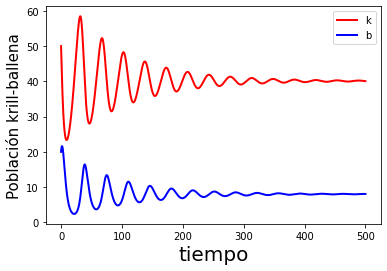

In [ ]:
#constantes
a = 1/10 #alpha tasa de crecimiento krill
b = 1/100 #beta TASA DE CONTACTO BALLENAS - KRILLS
c = 4/10 #gamma  #Tasa de muerte de ballenas
e = 1/100 #delta  #TASA DE CRECIMIENTO DE BALLENAS POR UNIDAD DE KRILLS
dt = 0.001 #0.01 dias

max_time = 500#dias
########
# condiciones iniciales
t = 0 #tiempo inicial
k = 50 # poblacion inicial krills
w = 20 #poblacion inicial ballenas

# listas vacias en donde guardar tiempos y poblacion
t_list = [] #tiempo
k_list = [] #población de krill
w_list = [] #población de ballenas

# iniciar listas
t_list.append(t)
k_list.append(k)
w_list.append(w)


while t < max_time:
    t = t + dt #tiempo
    k = k + (a*k*(1-k/200) - b*k*w)*dt #crecimiento krill
    w = w + (e*k*w*(1-w/(80*k))-c*w)*dt # crecimiento ballenas

    # Guardando los datos
    t_list.append(t)
    k_list.append(k)
    w_list.append(w)

plt.xlabel('tiempo',size=20)
plt.ylabel('Población krill-ballena',size=15)
# a. Poblacion depredador - presa vs tiempo
plt.plot(t_list, k_list, 'r', t_list, w_list, 'b', linewidth = 2)
plt.legend('kb')

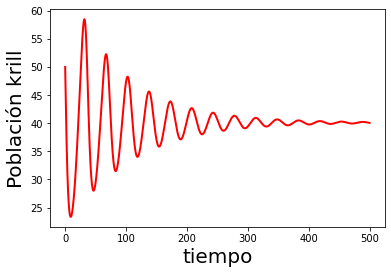

In [ ]:
# a. Gráfica tiempo vs poblacion krill
plt.xlabel('tiempo',size=20)
plt.ylabel('Población krill',size=20)
plt.plot(t_list, k_list, 'r',linewidth = 2)

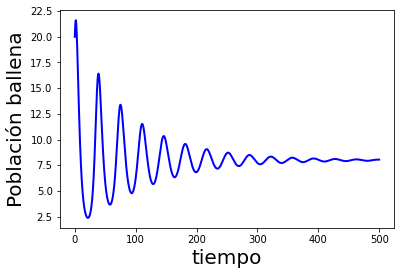

In [ ]:
# a. Gráfica tiempo vs poblacion ballena
plt.xlabel('tiempo',size=20)
plt.ylabel('Población ballena',size=20)
plt.plot(t_list, w_list, 'b',linewidth = 2)

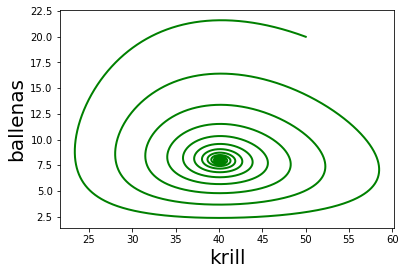

In [ ]:
# b. Gráfica krills vs ballenas
plt.xlabel('krill',size=20)
plt.ylabel('ballenas',size=20)
p=plt.plot(k_list, w_list, 'g', linewidth = 2)

Observaciones al cambiar datos en las gráficas:
- Al cambiar la población máxima de cada especie es posible encontrar que si esta es tiene un valor relativamente pequeño, las poblaciones se estabilizan más rápido lo que significa que hay muy pocas oscilaciones, mientras que si aumentamos este valor con respecto a las poblaciones iniciales, las poblaciones se toman más tiempo en estabilizarse lo que significa que hay más oscilaciones.
- c. De igual forma es posible identificar que al cambiar los valores iniciales o las constantes (como tasas de crecimiento, contacto o muertes) para que se tenga lo que en un sistema de ecuaciones depredador - presa normal sea un atractor, es decir, que las poblaciones iniciales sean el punto de equilibrio, se halla que al agregar el crecimiento logístico no se encuentran atractores tan fácilmente para los que se pueda modificar las poblaciones iniciales de modo tal que no presenten cambios sino que se mantengan constantes, en equilibrio. Sea poniendo las poblaciones iniciales con los datos de las constantes de las tasas o con la población máxima de cada especie, siempre se presentan oscilaciones antes de llegar a estabilizarse. A pesar de que es evidente que las poblaciones de presa y depredador llegan a un punto de equilibrio de 40 y 10 aproximadamente, exactamente por esa aproximación no se logra graficar de forma exitosa los atractores del sistema, pues, aunque se ponga varios decimales o se escriba con fracciones, siempre habrá una diferencia lo que significa que va a haber oscilaciones antes de llegar al punto de equilibrio. También es importante mencionar que, aunque no se logre encontrar un valor exacto en el que se equilibran las poblaciones, es evidente que ese valor puede estar ahí, solo que debe ser definido de manera muy exacta.

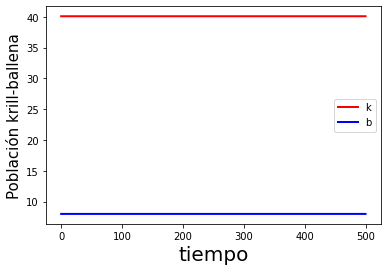

In [ ]:
#Para poblaciones inciales cercanas a los atractores
#constantes
a = 1/10 #alpha tasa de crecimiento krill
b = 1/100 #beta TASA DE CONTACTO BALLENAS - KRILLS
c = 4/10 #gamma  #Tasa de muerte de ballenas
e = 1/100 #delta  #TASA DE CRECIMIENTO DE BALLENAS POR UNIDAD DE KRILLS
dt = 0.001 #0.01 dias

max_time = 500#dias
########
# condiciones iniciales
t = 0 #tiempo inicial
k = 40.100000004 # poblacion inicial krills
w = 7.995001 #poblacion inicial ballenas

# listas vacias en donde guardar tiempos y poblacion
t_list = [] #tiempo
k_list = [] #población de krill
w_list = [] #población de ballenas

# iniciar listas
t_list.append(t)
k_list.append(k)
w_list.append(w)


while t < max_time:
    t = t + dt #tiempo
    k = k + (a*k*(1-k/200) - b*k*w)*dt #crecimiento krill
    w = w + (e*k*w*(1-w/(80*k))-c*w)*dt # crecimiento ballenas

    # Guardando los datos
    t_list.append(t)
    k_list.append(k)
    w_list.append(w)

plt.xlabel('tiempo',size=20)
plt.ylabel('Población krill-ballena',size=15)
# a. Poblacion depredador - presa vs tiempo
plt.plot(t_list, k_list, 'r', t_list, w_list, 'b', linewidth = 2)
plt.legend('kb')

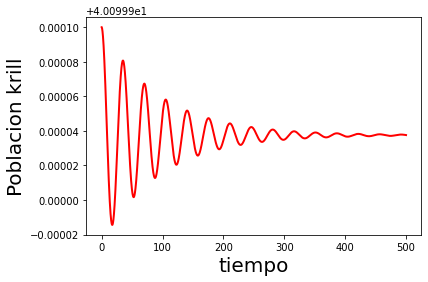

In [ ]:
#Grafica tiempo vs poblacion krill
plt.xlabel('tiempo',size=20)
plt.ylabel('Poblacion krill',size=20)
plt.plot(t_list, k_list, 'r',linewidth = 2)

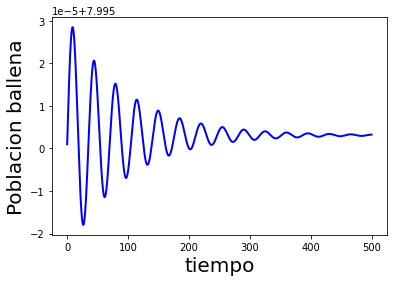

In [ ]:
# Grafica tiempo vs poblacion ballena
plt.xlabel('tiempo',size=20)
plt.ylabel('Poblacion ballena',size=20)
plt.plot(t_list, w_list, 'b',linewidth = 2)

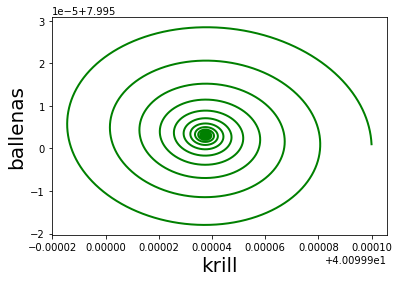

In [ ]:
plt.xlabel('krill',size=20)
plt.ylabel('ballenas',size=20)
p=plt.plot(k_list, w_list, 'g', linewidth = 2)

5. Lago Victoria: Como incluirían un tercer predador en las ecuaciones de Lotk Volterra?

Agregando un tercer predador podemos encontrarnos con diferentes escenarios:
- El segundo predador se alimenta de la presa "original", es decir, de la misma presa que se alimenta el primer predador, por lo aquí se presentaría una competencia por el alimento. La población de presas disminuye por contacto tanto con el primero como con el segundo depredador.

presa $=p$

depredador 1 $=z$

depredador 2 $=y$

$\alpha=$ Tasa de crecimiento presa.

$\beta=$ Tasa de contacto entre presa y depredador 1.

$\delta=$ la tasa de crecimiento depredador 1 por unidad de presas.

$\gamma=$ la tasa constante de muerte depredador 1.

$\mu=$ Tasa de contacto entre presa y depredador 2.

$\lambda=$ la tasa de crecimiento depredador 2 por unidad de presas.

$\theta=$ la tasa constante de muerte depredador 2.

###Ecuación presa

$$\frac{dp}{dt}=\alpha p - \beta pz - \mu py$$

$$\frac{\Delta p}{\Delta t}=\alpha p - \beta pz - \mu py$$

$$p_{t+1}=p_t + (\alpha p_t- \beta p_t z_t - \mu p_ty_t)*\Delta t$$

###Ecuación depredador 1

$$\frac{dz}{dt}=\delta pz-\gamma z$$
$$\frac{\Delta z}{\Delta t}=\delta pz-\gamma z$$
$$\Delta z=(\delta pz-\gamma z)*\Delta t$$

$$v_{t+1}=v_t + (\delta u_t v_t-\gamma v_t)*\Delta t$$

###Ecuación depredador 2

$$\frac{dy}{dt}=\lambda py-\theta y$$
$$\frac{\Delta y}{\Delta t}=\lambda py-\theta y$$
$$\Delta y=(\lambda py-\theta y)*\Delta t$$

$$y_{t+1}=y_t + (\lambda p_t y_t-\theta y_t)*\Delta t$$



- El segundo predador también tiene como alimento al primer predador, lo que significa que la población del primer predador varía por la tasa de contacto con el segundo predador y además de esto la población de la presa original también disminuye con la tasa de contacto con el segundo predador. A su vez, el segundo predador también depende de la caza del primer predador así que la tasa de crecimiento por unidad de presa o se sumaría como otro término más, así:

presa $=p$

depredador 1 $=z$

depredador 2 $=y$

$\alpha=$ Tasa de crecimiento presa.

$\beta=$ Tasa de contacto entre presa y depredador 1.

$\delta=$ la tasa de crecimiento depredador 1 por unidad de presas.

$\gamma=$ la tasa constante de muerte depredador 1.

$\mu=$ Tasa de contacto entre presa y depredador 2.

$\lambda=$ la tasa de crecimiento depredador 2 por unidad de presas.

$\theta=$ la tasa constante de muerte depredador 2.

$\eta=$ Tasa de contacto entre depredador 1 y depredador 2.

$\iota=$ Tasa de crecimiento depredador 2 por unidad de presas (depredador 1).
###Ecuación presa
$$\frac{dp}{dt}=\alpha p - \beta pz - \mu py$$

$$\frac{\Delta p}{\Delta t}=\alpha p - \beta pz - \mu py$$

$$p_{t+1}=p_t + (\alpha p_t- \beta p_t z_t - \mu p_ty_t)*\Delta t$$

###Ecuación depredador 1

$$\frac{dz}{dt}=\delta pz-\eta zy$$
$$\frac{\Delta z}{\Delta t}=\delta pz - \eta zy$$
$$\Delta z=(\delta pz- \eta zy)*\Delta t$$

$$v_{t+1}=v_t + (\delta u_t v_t- \eta z_ty_t)*\Delta t$$

###Ecuación depredador 2

$$\frac{dy}{dt}=\lambda py + \iota zy-\theta y$$
$$\frac{\Delta y}{\Delta t}=\lambda py+ \iota zy-\theta y$$
$$\Delta y=(\lambda py + \iota zy-\theta y)*\Delta t$$

$$y_{t+1}=y_t + (\lambda p_t y_t+ \iota zy-\theta y_t)*\Delta t$$

- El segundo predador se alimenta exclusivamente del primer predador, por lo que la poblacion del primero ya no disminuye por su tasa de muertes sino por su tasa de contacto con el segundo depredador.
presa $=p$

depredador 1 $=z$

depredador 2 $=y$

$\alpha=$ Tasa de crecimiento presa.

$\beta=$ Tasa de contacto entre presa y depredador 1.

$\delta=$ la tasa de crecimiento depredador 1 por unidad de presas.

$\theta=$ la tasa constante de muerte depredador 2.

$\eta=$ Tasa de contacto entre depredador 1 y depredador 2.

$\iota=$ Tasa de crecimiento depredador 2 por unidad de presas (depredador 1).
###Ecuación presa
$$\frac{dp}{dt}=\alpha p - \beta pz$$

$$\frac{\Delta p}{\Delta t}=\alpha p - \beta pz$$

$$p_{t+1}=p_t + (\alpha p_t- \beta p_t z_t)*\Delta t$$

###Ecuación depredador 1

$$\frac{dz}{dt}=\delta pz- \eta zy$$
$$\frac{\Delta z}{\Delta t}=\delta pz - \eta zy$$
$$\Delta z=(\delta pz - \eta zy)*\Delta t$$

$$v_{t+1}=v_t + (\delta u_t v_t- \eta z_ty_t)*\Delta t$$

###Ecuación depredador 2

$$\frac{dy}{dt}=\iota zy-\theta y$$
$$\frac{\Delta y}{\Delta t}=\iota zy-\theta y$$
$$\Delta y=(\iota zy-\theta y)*\Delta t$$

$$y_{t+1}=y_t + (\iota zy-\theta y_t)*\Delta t$$

- Observaciones: al momento de modificar las ecuaciones para agregar al segundo depredador me encontré con el interrogante de si debía o no remover la tasa de muertes del depredador 1 puesto que ahora su población podía ser disminuída por el depredador 2, al final tomé la decisión de eliminarla pues preferí que ahora la ecuación del depredador 1 se asemejara más a la de la presa, pues este realmente estaba pasando a ser una segunda presa, por lo que ahora tenía ese factor de caza que controlaba su población.

